 ## Hotel Selection System

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read the dataset here
Order_details = pd.read_csv('Order_details.csv', encoding="ISO-8859-1") # Please use your path and dataset for this parts!
Property_details = pd.read_csv('Property_details.csv', encoding="ISO-8859-1")

In [3]:
###Peek at the data
Property_details.head()

,propertyid,propertyname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,url
0,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,https://www.booking.com/hotel/hr/bungalow-luxu...
1,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,https://www.agoda.com/en-gb/hotel-polonia/hote...
2,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,http://www.booking.com/hotel/it/rifugio-sass-b...
3,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,https://www.agoda.com/en-gb/madalena-hotel/hot...
4,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,http://www.booking.com/hotel/it/pension-morenf...


In [4]:
## Peek at the order details
Order_details.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019
2,50643430,8323442,10/12/2019 15:47,12/20/2019,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019
3,50650317,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019
4,50650318,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019


In [5]:
### View all variables
Order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165873 entries, 0 to 165872
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 165873 non-null  int64  
 1   propertycode       165873 non-null  int64  
 2   dtcollected        165873 non-null  object 
 3   reservation date   165873 non-null  object 
 4   los                165873 non-null  int64  
 5   guests             165873 non-null  int64  
 6   roomtype           165873 non-null  object 
 7   onsiteprice        165873 non-null  float64
 8   ratedescription    161054 non-null  object 
 9   ratetype           161054 non-null  object 
 10  sourceurl          165873 non-null  object 
 11  roomamenities      161054 non-null  object 
 12  maxoccupancy       165873 non-null  int64  
 13  ispromo            165873 non-null  object 
 14  closed             165873 non-null  object 
 15  discount           165873 non-null  float64
 16  pr

In [6]:
Property_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106193 entries, 0 to 106192
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   propertyid    106193 non-null  int64  
 1   propertyname  106193 non-null  object 
 2   address       101103 non-null  object 
 3   city          106193 non-null  object 
 4   country       106193 non-null  object 
 5   zipcode       82303 non-null   float64
 6   propertytype  106193 non-null  object 
 7   starrating    106193 non-null  int64  
 8   latitude      106193 non-null  float64
 9   longitude     106193 non-null  float64
 10  url           106089 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 8.9+ MB


## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [7]:
#(1a)
## Make a copy of the property details 
Property_details_copy  = Property_details.copy()
## Convert values in the zipcode to string, then remove decimal values
Property_details_copy['zipcode'] = Property_details_copy['zipcode'].astype(str).apply(lambda x: x.replace('.0',''))
### Find properties with 84100 and count
Property_details_copy.zipcode[Property_details_copy.zipcode=='84100'].value_counts()

#There are 52 properties in the zip code 84100

84100    52
Name: zipcode, dtype: int64

In [8]:
#(1b)
### Subset the properties in the 84100 zip code to a separate dataframe
zip_84100_df = Property_details_copy[Property_details_copy.zipcode =='84100']

## Get statistical summary of the column starrating
zip_84100_df.starrating.describe()

count    52.000000
mean      2.846154
std       0.751068
min       2.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: starrating, dtype: float64

## Question 2

 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [9]:
#(2a)
## Create a copy of Order details df
Order_details_copy = Order_details.copy()
### Convert reservation date to date time
Order_details_copy['reservation date'] = pd.to_datetime(Order_details_copy['reservation date'])
### Create new column of weekday names from reservation date column
Order_details_copy['weekday'] = Order_details_copy['reservation date'].dt.day_name()
### get a glimpse of the 
Order_details_copy[['weekday', 'reservation date']].head()


,weekday,reservation date
0,Saturday,2019-11-02
1,Saturday,2019-11-30
2,Friday,2019-12-20
3,Saturday,2019-12-28
4,Saturday,2019-12-28


In [10]:
#(2b)
### GET THE FREQUENCY OF THE WEEK DAYS to get the day with the most reservation 
Order_details_copy.weekday.value_counts()

## Thursday and Monday have the most reservations

Thursday     26589
Monday       26539
Tuesday      24275
Wednesday    24082
Sunday       23030
Friday       20784
Saturday     20574
Name: weekday, dtype: int64

## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [11]:
roomamenities_str = Order_details_copy['roomamenities'].str.split(";", expand = True)
str_df = pd.DataFrame(roomamenities_str)

str_df = str_df.apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

str_df = str_df.replace(': ', '')

from collections import Counter

amenities_df = pd.DataFrame(Counter(" ".join(str_df).split(",")).items())


In [12]:
amenities_df['Item'] = amenities_df[0]
amenities_df['Frequency'] = amenities_df[1]
amenities_df = amenities_df[['Item', 'Frequency']]
amenities_df['percentage'] = amenities_df.Frequency/len(Order_details_copy.propertycode)
amenities_df = amenities_df.sort_values(by=['Frequency'], ascending=False)
amenities_df.head(n = 10)

,Item,Frequency,percentage
11,In-room safe box:,161054,0.970948
8,Free Wi-Fi in all rooms!:,157613,0.950203
19,Air conditioning:,145902,0.879601
9,Hair dryer:,127316,0.767551
16,Toiletries:,119993,0.723403
10,Heating:,119196,0.718598
5,Desk:,114593,0.690848
34,Telephone:,113827,0.686230
3,Closet:,113368,0.683463
17,Towels:,106225,0.640400


## Question 4

#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [14]:
#4(a)
## Function for median
Order_details_copy.onsiteprice.median()
### Replace zero values with median
Order_details_copy['replacedonsiteprice'] = Order_details_copy['onsiteprice'].replace(0, Order_details_copy.onsiteprice.median())

### Peek 
Order_details_copy['replacedonsiteprice'].head()

0     82.36
1    636.09
2    591.74
3    881.48
4    897.53
Name: replacedonsiteprice, dtype: float64

In [15]:
#4(b)
## Create new df for max and min of replacedonsite price grouped by property code
mx_min_price = Order_details_copy.groupby('propertycode').agg(
    # Get max of the duration column for each group
    Maximum=('replacedonsiteprice', max),
    # Get min of the duration column for each group
    Minimum=('replacedonsiteprice', min)
)

### Calculation for normalized maximum price

mx_min_price['num'] = mx_min_price['Maximum'] - min(mx_min_price['Maximum'])
mx_min_price['den'] = max(mx_min_price['Maximum']) - min(mx_min_price['Maximum'])

mx_min_price['normalized_maximum'] = mx_min_price['num']/mx_min_price['den']

## drop the columns that are not needed
mx_min_price = mx_min_price.drop(['num', 'den'], axis=1)

#export to csv
mx_min_price.to_csv('Mx_Min Price.csv')


## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [25]:
#5(a) 
# merge columns
merged_df = pd.merge(Property_details_copy,Order_details_copy,left_on='propertyid',right_on='propertycode')
#Get df for max occupacy of 3 or more
family_df = merged_df[merged_df.maxoccupancy >= 3]  
##There are 18170 properties with occupancy of 3 or more
family_df = family_df[family_df.propertytype == "Hotels"] 
## 17868 properties with max occupacy >=3 and property type is Hotels
family_df = family_df[family_df.closed == "N"] ## 16923 are not closed
family_df = family_df[family_df.hotelblock != 'Sold out']
#len(family_df['propertyid'].unique()) ## No hotel blocks have been sold out of the filtered records

'There are %s available hotels' %len(family_df['propertyid'].unique()) 

'There are 3085 available hotels'

In [26]:
#5(b)
family_df = family_df[family_df.replacedonsiteprice <= 150]

'There are %s available hotels' %len(family_df['propertyid'].unique()) #8680 records remaining

'There are 2103 available hotels'

## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [18]:
df = (merged_df.groupby(['country', 'propertyid'])['replacedonsiteprice']
         .agg([np.mean])
         .add_suffix('_replacedonsiteprice')
         .reset_index())

df1 = merged_df[['propertyid', 'propertyname', 'city', 'zipcode', 'address']]

df2 = df.groupby('country').max().reset_index()

exp_per_country = pd.merge(df1,df2,on='propertyid').drop_duplicates()

exp_per_country

,propertyid,propertyname,city,zipcode,address,country,mean_replacedonsiteprice
0,7307410,Peitche Lauer,Useldange,8706,4 AmTremel,Luxembourg,285.215000
3,7388882,Hotel Bratislava,Bratislava,82103,Seberiniho 9,Slovakia,234.076667
35,7621602,ibis Tallinn Center,Tallinn,10132,Juhkentali 28,Estonia,193.548636
63,7646542,Ble Mavi studio- BED & BREAKFAST - Adults only,Vouni,4772,Ellados 3,Cyprus,302.820000
64,7796793,Puntukas,Kuciai,29132,15 A. Baranausko aikste,Lithuania,297.371667
72,8166773,Motel One Linz,Linz,4020,10 Hauptplatz,Austria,655.020000
74,8342605,Baobab Suites,Siofok,8600,23 Batthyany Lajos utca,Hungary,3231.450000
86,8422960,Hotel Breeze Amsterdam,Amsterdam,nan,Bert Haanstrakade 1074 Hoek Krijn Taconiskade,Netherlands,394.116333
106,8444824,Estate Marjetin dom,Idrija,5280,Dole 16B,Slovenia,224.741826
113,8521875,Teatterihotelli Riihimaki,Hyvinkaa,11100,Hameenaukio 1,Finland,512.370000


In [19]:
#(b) 
df3 = df.groupby('country').min().reset_index()

cheapest_per_country = pd.merge(df1,df3,on='propertyid').drop_duplicates()

cheapest_per_country 

,propertyid,propertyname,city,zipcode,address,country,mean_replacedonsiteprice
0,2016,Scandic Park,Stockholm,nan,Karlavagen 43,Sweden,43.330000
26,2202,Radisson Blu Sky Hotel Tallinn,Tallinn,10143,Ravala Street 3,Estonia,84.365714
48,834,Radisson Blu Resort,St. Julian's,nan,St. Georges Bay,Malta,49.173699
102,91719,Aston Hotel,Bratislava,nan,Bajkalska 22,Slovakia,33.656000
110,96945,Hotel Jezero,Bohinjsko Jezero,4265,Ribcev Laz 51,Slovenia,40.370000
117,97,Amba Hotel Charing Cross,London,nan,The Strand,United Kingdom,31.140000
139,989,Novotel Eindhoven,Eindhoven,5657,Anthony Fokkerweg 101,Netherlands,47.190000
165,2756,Mercure Poznan Hotel,Poznan,nan,ul rooseveltast 20,Poland,21.420000
219,287,Hotel Mercure Beaune Centre,Beaune,21200,7 Avenue Charles De Gaulle,France,33.150000
253,2962,Les Nations Hotel,Geneva,1202,62 Grand Pre street,Switzerland,48.665000


## Part 2 (9 Points):

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets.     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (2 points)
    2. You need to answer these five questions using Python and the datasets. (2 points)
    3. You need to have at least "5" graphs to visualize your insights. (2 points)
    4. Your executive summary of your answers is well-written and makes sense. (2 points)
    5. Your business insights are very interesting and the report is creative. (1 points)


In [20]:
Order_details_copy.discount.head()

0    6.24
1    0.00
2    0.00
3    0.00
4    0.00
Name: discount, dtype: float64

**(You need to use this cell to write your 5 questions)**

**Question 1:** How do prices compare with max occupancy in switzerland ?

**Question 2:** Which is are the most expensive cities in Greece ?

**Question 3:** Which day has the highest discount generally for the whole dataset and that of Italy ?

**Question 4:** Compare the starratings and discounts in Romania and France?

**Question 5:** Compare discounts in United Kindom and Germany ?


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
plt.figure(figsize=(15,16))

<Figure size 1080x1152 with 0 Axes>

<Figure size 1080x1152 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

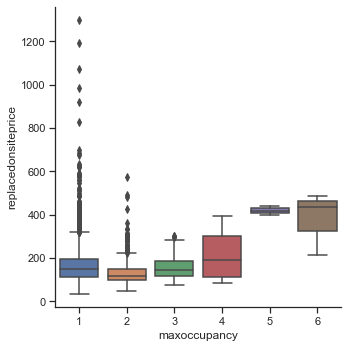

In [22]:
# Your code to answer Question 1
switzerland_df = merged_df[['city', 'maxoccupancy', 'replacedonsiteprice', 'reservation date', 'discount']][merged_df.country =='Switzerland']


plt.figure(figsize = (15,8))
sns.catplot(x="maxoccupancy", y="replacedonsiteprice", kind="box", data=switzerland_df)


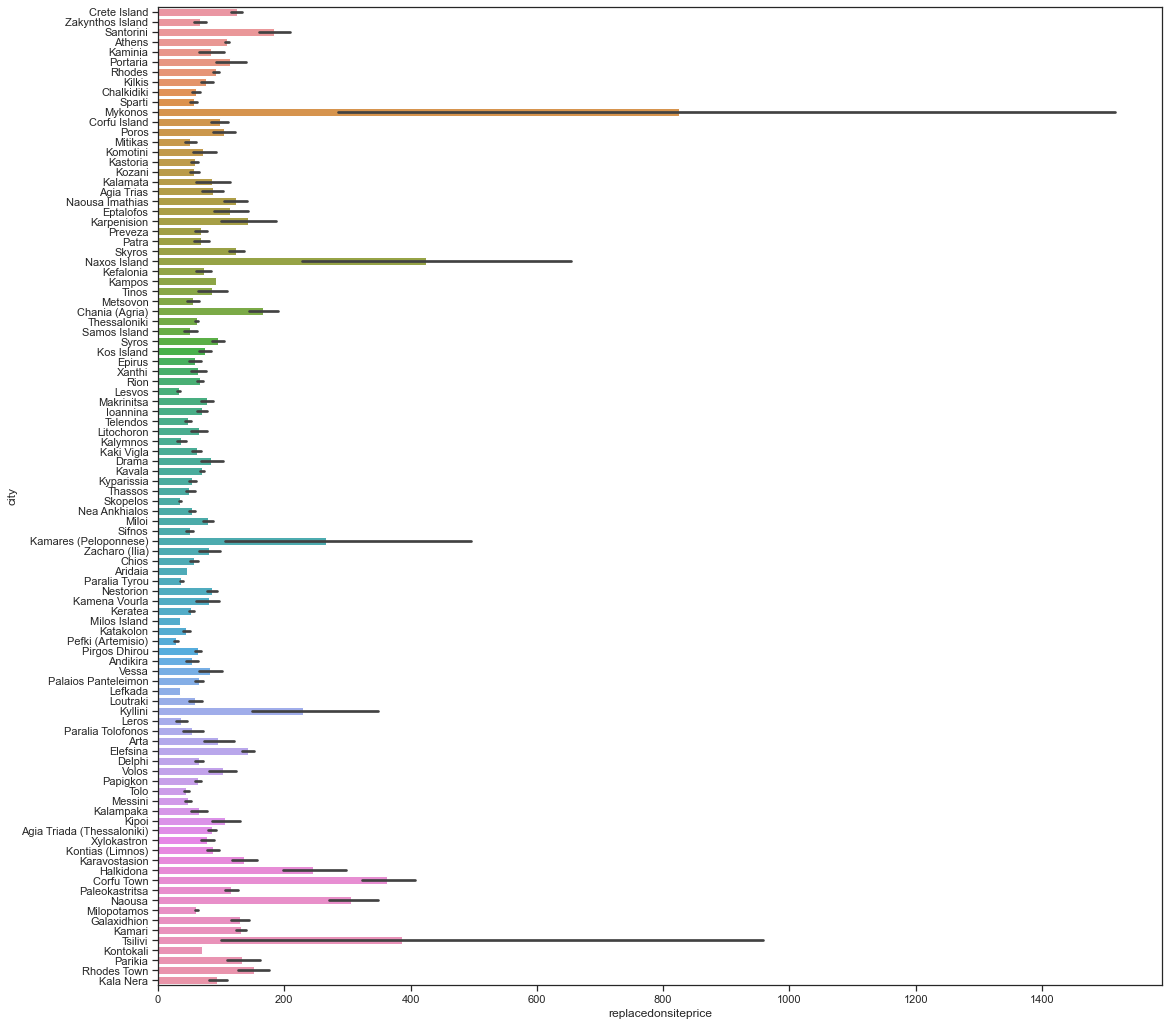

In [23]:
# Your code to answer Question 2
maxoccupancy_price_df = merged_df[['country', 'city', 'maxoccupancy', 'replacedonsiteprice', 'weekday']][merged_df.country =='Greece']

#sns.displot(maxoccupancy_price_df, x="replacedonsiteprice", hue="maxoccupancy", stat="probability")
plt.figure(figsize=(18,18))
sns.barplot(y="city", x="replacedonsiteprice", data=maxoccupancy_price_df)
plt.show()
### France

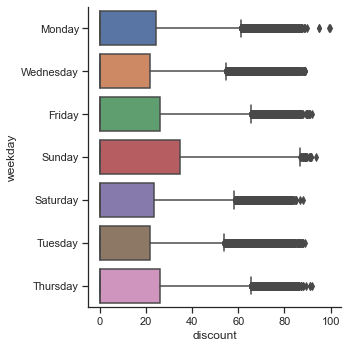

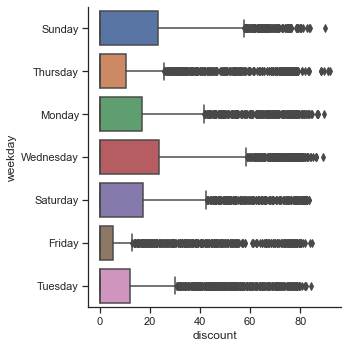

In [25]:
# Your code to answer Question 3
Italy_df = merged_df[['city', 'discount', 'weekday']][merged_df.country =='Italy']

Italy_df_avg = Italy_df.groupby('city').mean().reset_index()

sns.catplot(x="discount", y="weekday",
            kind="box", data=merged_df)

sns.catplot(x="discount", y="weekday",
            kind="box", data=Italy_df)


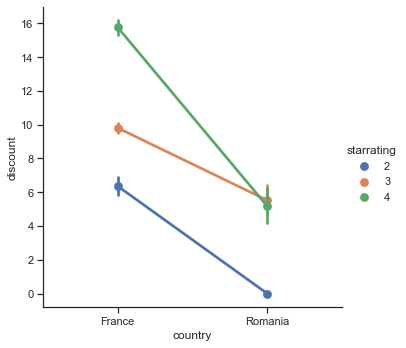

In [26]:
# Your code to answer Question 4
france_romania = merged_df[['country','city', 'discount', 'starrating']][merged_df['country'].isin(['France','Romania'])]

sns.catplot(x="country", y="discount",  hue = 'starrating', kind="point", data=france_romania)

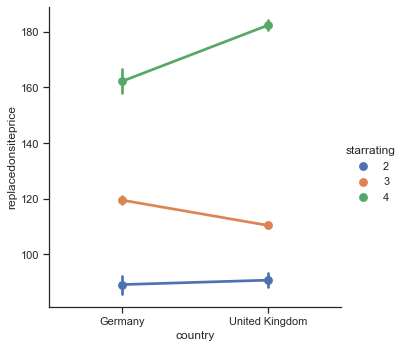

In [28]:
# Your code to answer Question 5

uk_germany = merged_df[['country','city', 'discount', 'starrating', 'maxoccupancy', 'replacedonsiteprice']][merged_df['country'].isin(['Germany','United Kingdom'])]

sns.catplot(x='country', y='replacedonsiteprice', hue = 'starrating', kind="point", data=uk_germany)


## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.


**Question 1**

From analysis on the data provided, the following questions were formulated. The first question that was tackled was if there was a relatioship that existed between max occupancy and the onsite price. The case of switzerland was  selected to be the focus of the question. From the boxplot of max occupancy against replaced onsite price, the replaced onsite price,increased, generally as the maximum number of occupancy increased. The maximum occupancy of one had a lot of outliers and also was  higher than two and three maximum occupancy. This is because of the large variaety of property types that offered one maximum occupacy. The type of properties that offer two or more maximum occupancy, reduce significantly, and those that do, have the same characteristics and therefore, charge the same. A case study was selcetd because, prices change significantly from country to country, and each country has its unique characteristics in terms of price and property types.

**Question 2**

Greece is known is for its rich historical cultural heritage, it therefore makes sense to identify which areas are the most expensive; for customers to plan ahead on the charges they expect to incur or select other areas. In determining the most expensive cities in Greece, the cheapest cities were also identified, therefore the customer was given more option. For one intending to start a business, one can determine how to set the appropriate prices if they are start the business there. The most expensive cities were Mykonos, Naxos Island, Kamares, Kylini, Tsilivi and Corfu Town. The error bars on the plot showed that prices  are not fixed, they have a range, a huge one, therefore, the properties charge prices on their own merit, it is a free market.

**Question 3**

The relationship between discounts and the day of the week was explored. Based on the day of the week, hotels could be offering some kind of discount. There were two approaches in this instance. The whole dataset, that is all countries and the second one was that of Italy. Sundays in both instances offered the largest discount and on Thursday. Sundays because, probably people are travelling to work conferences that take place when the week starts and on Thursday, it is end of week and people are making reservations for weekend entertaininment, that begins at end of Friday's working day. The treend above howeveris not the case for Italy. The discounts do not differ much in the global dataset, but one can note that for Italy, the discounts for different days have significant differences.

**Question 4**

Discounts vs Star rating: From the plot above comparing French and Romanian hotels, there seems to exist a relation between the amount of discount offered by a hotel and how customers rate the hotel. First, French hotels offer higher discounts, than Romanian Hotels. In both cases, hotels offering higher discounts  are rated higher than hotels that offer lower discounts.

**Question 5**

United Kingdom vs Germany
Four Star rated hotels and two star rated hotels in the United Kingdom are more expensive than those in Germany. Three star rated hotels in Germany are more expensive than in the United Kingdom. The information will help one determine the prices of the hotels if they were to set in Germany or the United Kingdom, or customers to plan ahead, if they are travelling through the European Union.



PART 1 - Question Points: 
1a - 2 points;
1b - 1 point;
2a - 3 points;
2b - 2 points;
3a - 3 points;
3b - 1 point;
4a - 3 points;
4b - 4 points;
5a - 3 points;
5b - 3 points;
Bonus(a) - 1 point;
Bonus(b) - 1 point;

PART 2 - 
9 points total


Good Luck!